In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy 
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458
import matplotlib.patches as patches
import os
import sys
import pandas as pd
import numpy as np
from descartes import PolygonPatch
import matplotlib.pyplot as plt
#sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape

In [2]:
fuji = pd.read_csv("fp_full_sample.csv")
fuji

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,uncor_radius,BA_ratio,circ_radius,err_shape_r,err_shape_e1,err_shape_e2,pos_angle,Separation,mag_r_corrected,BA_ratio_error
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,5.184430,0.350286,3.068401,0.001139,0.000157,0.000162,-22.695267,9.032862e-10,14.540710,0.000112
1,39633328785066059,712,179.398240,55.458735,39633328785066059,2655,5975,sv2,bright,39633328785066059,...,9.025970,0.507324,6.428902,0.001573,0.000064,0.000059,41.649310,8.338294e-10,12.195682,0.000062
2,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,16.809520,0.724272,14.305606,0.001752,0.000059,0.000071,-1.229870,1.697334e-10,12.205269,0.000095
3,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,5.249352,0.847887,4.833643,0.002201,0.000309,0.000279,-30.161512,2.747763e-10,14.908445,0.000500
4,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,13.251365,0.668181,10.831973,0.003197,0.000090,0.000087,-31.605590,4.270247e-10,12.258801,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,39627586577372913,174,35.756452,-8.314618,39627586577372913,1187,36782,sv1,bright,39627586577372913,...,5.443123,0.879590,5.104913,0.001171,0.000259,0.000234,64.470810,1.820861e-10,15.273764,0.000434
6694,39627805192882082,102,139.833925,0.718408,39627805192882082,1331,27314,sv1,bright,39627805192882082,...,13.624000,0.390592,8.514643,0.033813,0.003029,0.002024,40.118137,1.190706e-09,17.284367,0.002013
6695,39627793843093694,787,183.258856,0.253032,39627793843093694,3470,26278,sv3,bright,39627793843093694,...,5.935657,0.842653,5.448703,0.008594,0.002901,0.001932,37.346825,8.243920e-10,17.309303,0.004153
6696,39632996659102707,111,253.477542,35.676715,39632996659102707,3479,9514,sv3,bright,39632996659102707,...,5.500339,0.484654,3.829176,0.021271,0.003459,0.003522,21.329023,9.071775e-10,17.947032,0.003383


In [3]:
#desi_footprint = pd.read_csv("desi-14k-footprint-dark-20220226.csv")
desi_footprint = pd.read_csv("desi_footprint.csv")
desi_footprint

,TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE,PRIORITY_BOOSTFAC
0,1000,0,238.282,0.000,DARK,True,1.4580,done,0.101,15.91,1.1687,True,1.0
1,1001,0,270.000,58.282,DARK,True,0.9450,done,0.044,31.26,1.0143,True,1.0
2,1002,0,0.000,31.717,DARK,True,0.8348,unobs,0.049,8.29,0.0000,True,1.0
3,1003,0,180.000,31.717,DARK,True,0.8349,unobs,0.020,-4.55,0.0000,True,1.0
4,1004,0,180.000,69.094,DARK,True,0.6493,unobs,0.015,-2.74,0.0000,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18257,43081,0,148.410,-13.555,BACKUP,True,1.2570,obsend,0.055,0.00,1.1416,True,1.0
18258,43082,0,148.929,16.403,BACKUP,True,0.9266,unobs,0.031,0.00,0.0000,True,1.0
18259,43083,0,128.877,3.001,BACKUP,True,1.3960,obsend,0.033,0.00,1.0106,True,1.0
18260,43084,0,157.041,-2.635,BACKUP,True,1.4170,obsend,0.045,0.00,1.1002,True,1.0


In [4]:
desi_footprint_dark = desi_footprint.drop(desi_footprint[desi_footprint.PROGRAM !="DARK"].index)
#fuji_gsigma_lowz = fuji.drop(fuji[fuji.z > 0.1].index)
desi_footprint_dark

,TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE,PRIORITY_BOOSTFAC
0,1000,0,238.282,0.000,DARK,True,1.4580,done,0.101,15.91,1.1687,True,1.0
1,1001,0,270.000,58.282,DARK,True,0.9450,done,0.044,31.26,1.0143,True,1.0
2,1002,0,0.000,31.717,DARK,True,0.8348,unobs,0.049,8.29,0.0000,True,1.0
3,1003,0,180.000,31.717,DARK,True,0.8349,unobs,0.020,-4.55,0.0000,True,1.0
4,1004,0,180.000,69.094,DARK,True,0.6493,unobs,0.015,-2.74,0.0000,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,11957,1,240.395,9.575,DARK,True,1.3730,done,0.050,17.04,0.9701,True,1.0
9925,11958,1,250.036,6.945,DARK,True,1.3960,done,0.086,20.99,1.0171,True,1.0
9926,11959,0,327.055,-1.254,DARK,True,1.0340,unobs,0.068,-1.65,0.0000,False,1.0
9927,11960,2,5.315,32.177,DARK,True,1.1320,done,0.062,8.47,1.0414,True,1.0


In [5]:
print (min(fuji["dec_1"]))

-29.955813251754


In [6]:
ccc = SkyCoord(fuji.ra_1, fuji.dec_1, frame='icrs', unit='deg')
x001 = ccc.transform_to('galactic')
x002 = ccc.galactic

ccc_desi = SkyCoord(desi_footprint_dark.RA, desi_footprint_dark.DEC, frame='icrs', unit='deg')
x001_desi = ccc_desi.transform_to('galactic')
x002_desi = ccc_desi.galactic

In [7]:
print (x001.l.value)

[236.57474162 138.25663783  27.7265911  ... 282.41485147  58.41224372
  66.45740224]


In [8]:
x002.l.value

array([236.57474162, 138.25663783,  27.7265911 , ..., 282.41485147,
        58.41224372,  66.45740224])

In [9]:
l01 = np.where(x001.l.value > 180., x001.l.value-360.,x001.l.value)
l01_desi = np.where(x001_desi.l.value > 180., x001_desi.l.value-360.,x001_desi.l.value)

In [10]:
l01

array([-123.42525838,  138.25663783,   27.7265911 , ...,  -77.58514853,
         58.41224372,   66.45740224])

In [11]:
fuji_plot = pd.DataFrame(np.column_stack((l01,x001.b.value,c*fuji.z)),columns=["l", "b", "cz"])

In [12]:
fuji_plot.to_csv('fuji_plot_n.csv',sep=' ',index=False,header=True)

In [13]:
np.radians(180.)

3.141592653589793

In [14]:
l = np.radians(l01)
l_desi = np.radians(l01_desi)

In [15]:
l

array([-2.15417714,  2.41303354,  0.48392031, ..., -1.35411629,
        1.01948598,  1.15990048])

In [16]:
b = np.radians(x001.b.value)
b_desi = np.radians(x001_desi.b.value)

In [17]:
b

array([1.5606181 , 1.04787077, 1.55956405, ..., 1.07486994, 0.66955597,
       0.76676775])

In [18]:
dust = pd.read_csv("EBVforKhaled.txt", delim_whitespace=True)
dust.columns = ["ebv","l_dust","b_dust"]
dust

,ebv,l_dust,b_dust
0,0.010491,135.0,89.908629
1,0.012068,225.0,89.908629
2,0.012685,315.0,89.908629
3,0.015174,22.5,89.817258
4,0.012583,67.5,89.817258
...,...,...,...
3145722,0.015806,337.5,-89.817258
3145723,0.016702,45.0,-89.908629
3145724,0.014851,135.0,-89.908629
3145725,0.015075,225.0,-89.908629


In [19]:
# c_dust = SkyCoord(l=np.array(dust.l_dust)*u.deg, b=np.array(dust.b_dust)*u.deg, frame='galactic')
# c_dust_icrs = c_dust.icrs
# ra_dust = c_dust_icrs.ra.wrap_at(180 * u.deg).radian
# dec_dust = c_dust_icrs.dec.radian

In [20]:
dust.l_dust

0          135.0
1          225.0
2          315.0
3           22.5
4           67.5
           ...  
3145722    337.5
3145723     45.0
3145724    135.0
3145725    225.0
3145726    315.0
Name: l_dust, Length: 3145727, dtype: float64

In [21]:
l_dust = np.where(dust.l_dust > 180., dust.l_dust-360.,dust.l_dust)
b_dust = dust.b_dust
ebv_dust = np.log10(dust.ebv)

0      -123.425258
1       138.256638
2        27.726591
3       -73.682937
4      -179.792963
           ...    
6693    176.233810
6694   -128.840282
6695    -77.585149
6696     58.412244
6697     66.457402
Name: l, Length: 6698, dtype: float64


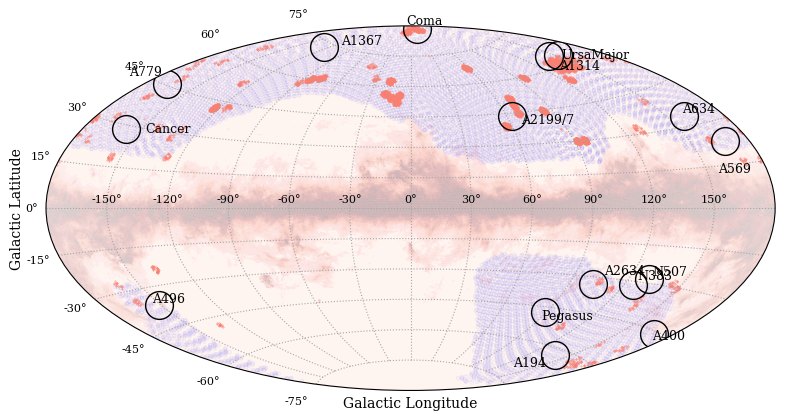

In [22]:
WISE_Data = pd.read_csv("WISE_Data_Mk2.txt", sep="\t", skiprows=[0], header=None)

WISE_Data.columns = ['2MAS_Name', 'NedName','Abell_ID', 'Morph_Type', 'Ra', 'Dec', 'Axis_Ratio', 'Luminosity_Distance',
                     'Redshift', 'Log_W', 'Log_W_err', 'flux_W1', 'flux_W1_err', 'flux_W2', 'flux_W2_err', 'mag_W1',
                     'mag_W2', 'mag_W1_err', 'mag_W2_err', 'Khaled Ids', 'Correct Cluster Names']

groups = WISE_Data.groupby("Correct Cluster Names")

fuji = pd.read_csv("fuji_plot_n.csv", delimiter=' ')
l = np.radians(fuji.l)
b = np.radians(fuji.b)
print (fuji.l)
# Get an array of cluster ID's
Ids = list(groups.groups.keys())

# Set up the figure
plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1, projection='aitoff') # or hammer or mollweid if you prefer
plt.subplots_adjust(top=0.95, bottom=0.02, right=0.95, left=0.08)


# position adjustments for the cluster names (so that they don't overlap with the points)
r_thing = [-0.38, 0.15, -0.15, 0.04, 0.04,
           -0.45, -0.02, 0.05, 0.09, -0.03,
           -0.22, 0.02, -0.48, -0.35, 0.2,
           -0.43,0.2, 0.1, -0.2, 0.09,
           -0.2, 0.1, -0.4, -0.0, 0.,
           -0.15, -0.41, 0.04, 0.06, -0.6, -1.45]
d_thing = [-0.07, 0.05, -0.14, -0.07, 0.08,
           0.06, 0.05, -0.04, -0.03, 0.025,
           -0.18, 0.02, -0.04, 0.05, -0.00,
           -0.05, 0.05, -0.03, -0.13, -0.03,
           -0.07, -0.03, 0.06, 0.04, 0.03,
           -0.18, 0.045, -0.06, -0.04, 0.06, 0.08]

from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [-3.0, 0.0, 3.0]
        return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(midpoint=-1.0)
ax.scatter(np.radians(l_dust),np.radians(b_dust),s=0.1, c=ebv_dust,edgecolors='none',cmap='Reds',norm=norm,alpha=0.1,rasterized = True)
for i, Id in enumerate(Ids):
    group = groups.get_group(Id)
    ra_group = np.average(group['Ra'])
    dec_group = np.average(group['Dec'])
    if dec_group > -18.0:

        c = SkyCoord(ra=ra_group * u.deg, dec=dec_group * u.deg)

        # convert the coordinates from ra and dec to galactic coordinates
        c_gal = c.galactic

        # get the galactic Longitude in radians
        c_longitude = c_gal.l.radian

        # flip the Longitudes larger than pi to the other side of the plot
        if c_longitude > np.pi:
            c_longitude -= 2 * np.pi

        # get the galactic latitude in radians
        c_latitude = c_gal.b.radian

        # define the sizes of the points
        size = round(len(group))/3

        
        ax.text(c_longitude+r_thing[i], c_latitude+d_thing[i], r'{}'.format(Id), fontsize=9, color='black')
        ax.plot(c_longitude, c_latitude, 'o', markersize=20, color='black', markeredgecolor='black',mfc='none')
ax.scatter(l_desi,b_desi,s=5.,alpha=0.05,facecolors='none', edgecolors='b')
ax.scatter(l,b,s=0.1,color='salmon')
ax.grid(visible=True, which='both', color='0.65', linestyle=':')
ax.set_ylabel('Galactic Latitude', fontsize=10, labelpad=1)
ax.set_xlabel('Galactic Longitude', fontsize=10, labelpad=+4)
plt.tight_layout()
plt.savefig('fuji_New.pdf')
plt.show()

0      -123.425258
1       138.256638
2        27.726591
3       -73.682937
4      -179.792963
           ...    
6693    176.233810
6694   -128.840282
6695    -77.585149
6696     58.412244
6697     66.457402
Name: l, Length: 6698, dtype: float64


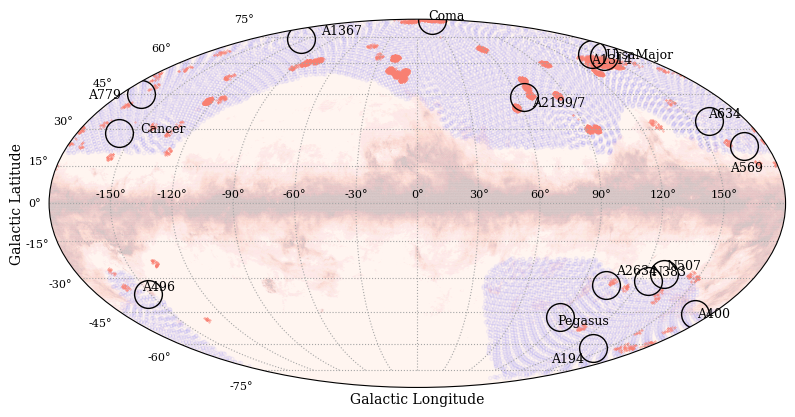

In [23]:
WISE_Data = pd.read_csv("WISE_Data_Mk2.txt", sep="\t", skiprows=[0], header=None)

WISE_Data.columns = ['2MAS_Name', 'NedName','Abell_ID', 'Morph_Type', 'Ra', 'Dec', 'Axis_Ratio', 'Luminosity_Distance',
                     'Redshift', 'Log_W', 'Log_W_err', 'flux_W1', 'flux_W1_err', 'flux_W2', 'flux_W2_err', 'mag_W1',
                     'mag_W2', 'mag_W1_err', 'mag_W2_err', 'Khaled Ids', 'Correct Cluster Names']

groups = WISE_Data.groupby("Correct Cluster Names")

fuji = pd.read_csv("fuji_plot_n.csv", delimiter=' ')
l = np.radians(fuji.l)
b = np.radians(fuji.b)
print (fuji.l)
# Get an array of cluster ID's
Ids = list(groups.groups.keys())

# Set up the figure
plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1, projection='mollweide') # or hammer or mollweid if you prefer
plt.subplots_adjust(top=0.95, bottom=0.02, right=0.95, left=0.08)


# position adjustments for the cluster names (so that they don't overlap with the points)
r_thing = [-0.38, 0.15, -0.15, 0.04, 0.04,
           -0.45, -0.02, 0.05, 0.09, -0.03,
           -0.22, 0.02, -0.48, -0.35, 0.2,
           -0.43,0.2, 0.1, -0.2, 0.09,
           -0.2, 0.1, -0.4, -0.0, 0.,
           -0.15, -0.41, 0.04, 0.06, -0.6, -1.45]
d_thing = [-0.07, 0.05, -0.14, -0.07, 0.08,
           0.06, 0.05, -0.04, -0.03, 0.025,
           -0.18, 0.02, -0.04, 0.05, -0.00,
           -0.05, 0.05, -0.03, -0.13, -0.03,
           -0.07, -0.03, 0.06, 0.04, 0.03,
           -0.18, 0.045, -0.06, -0.04, 0.06, 0.08]

from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [-3.0, 0.0, 3.0]
        return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(midpoint=-1.0)
ax.scatter(np.radians(l_dust),np.radians(b_dust),s=0.1, c=ebv_dust,edgecolors='none',cmap='Reds',norm=norm,alpha=0.1,rasterized = True)
for i, Id in enumerate(Ids):
    group = groups.get_group(Id)
    ra_group = np.average(group['Ra'])
    dec_group = np.average(group['Dec'])
    if dec_group > -18.0:

        c = SkyCoord(ra=ra_group * u.deg, dec=dec_group * u.deg)

        # convert the coordinates from ra and dec to galactic coordinates
        c_gal = c.galactic

        # get the galactic Longitude in radians
        c_longitude = c_gal.l.radian

        # flip the Longitudes larger than pi to the other side of the plot
        if c_longitude > np.pi:
            c_longitude -= 2 * np.pi

        # get the galactic latitude in radians
        c_latitude = c_gal.b.radian

        # define the sizes of the points
        size = round(len(group))/3

        
        ax.text(c_longitude+r_thing[i], c_latitude+d_thing[i], r'{}'.format(Id), fontsize=9, color='black')
        ax.plot(c_longitude, c_latitude, 'o', markersize=20, color='black', markeredgecolor='black',mfc='none')
ax.scatter(l_desi,b_desi,s=5.,alpha=0.05,facecolors='none', edgecolors='b')
ax.scatter(l,b,s=0.1,color='salmon')
ax.grid(visible=True, which='both', color='0.65', linestyle=':')
ax.set_ylabel('Galactic Latitude', fontsize=10, labelpad=1)
ax.set_xlabel('Galactic Longitude', fontsize=10, labelpad=+4)
plt.tight_layout()
plt.savefig('fuji_New_mollweide.pdf')
plt.show()

RA range: -3.14 to 3.14 radians
DEC range: -0.52 to 1.47 radians


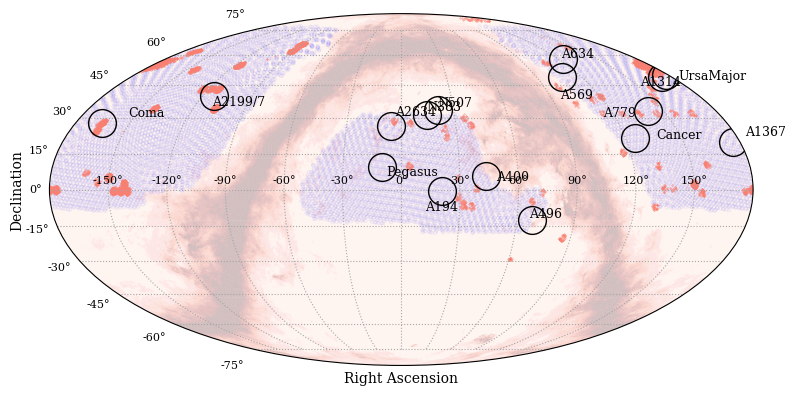

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.colors import Normalize

# Read the data
WISE_Data = pd.read_csv("WISE_Data_Mk2.txt", sep="\t", skiprows=[0], header=None)
WISE_Data.columns = ['2MAS_Name', 'NedName','Abell_ID', 'Morph_Type', 'Ra', 'Dec', 'Axis_Ratio', 'Luminosity_Distance',
                     'Redshift', 'Log_W', 'Log_W_err', 'flux_W1', 'flux_W1_err', 'flux_W2', 'flux_W2_err', 'mag_W1',
                     'mag_W2', 'mag_W1_err', 'mag_W2_err', 'Khaled Ids', 'Correct Cluster Names']
groups = WISE_Data.groupby("Correct Cluster Names")

# Read fuji data and convert to RA and DEC
fuji = pd.read_csv("fuji_plot_n.csv", delimiter=' ')
c_gal = SkyCoord(l=np.array(fuji.l)*u.degree, b=np.array(fuji.b)*u.degree, frame='galactic')
c_icrs = c_gal.icrs
ra_fuji = c_icrs.ra.wrap_at(180 * u.deg).radian
dec_fuji = c_icrs.dec.radian

print(f"RA range: {np.min(ra_fuji):.2f} to {np.max(ra_fuji):.2f} radians")
print(f"DEC range: {np.min(dec_fuji):.2f} to {np.max(dec_fuji):.2f} radians")

# Get an array of cluster ID's
Ids = list(groups.groups.keys())

# Set up the figure
plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1, projection='mollweide')
plt.subplots_adjust(top=0.95, bottom=0.02, right=0.95, left=0.08)

# position adjustments for the cluster names (so that they don't overlap with the points)
r_thing = [-0.38, 0.15, -0.15, 0.04, 0.04,
           -0.45, -0.02, 0.05, 0.09, -0.03,
           -0.22, 0.02, -0.48, -0.35, 0.2,
           -0.43,0.2, 0.1, -0.2, 0.09,
           -0.2, 0.1, -0.4, -0.0, 0.,
           -0.15, -0.41, 0.04, 0.06, -0.6, -1.45]
d_thing = [-0.07, 0.05, -0.14, -0.07, 0.08,
           0.06, 0.05, -0.04, -0.03, 0.025,
           -0.18, 0.02, -0.04, 0.05, -0.00,
           -0.05, 0.05, -0.03, -0.13, -0.03,
           -0.07, -0.03, 0.06, 0.04, 0.03,
           -0.18, 0.045, -0.06, -0.04, 0.06, 0.08]

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [-3.0, 0.0, 3.0]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=-1.0)

# Convert l_dust and b_dust to RA and DEC
c_dust = SkyCoord(l=np.array(l_dust)*u.degree, b=np.array(b_dust)*u.degree, frame='galactic')
c_dust_icrs = c_dust.icrs
ra_dust = c_dust_icrs.ra.wrap_at(180 * u.deg).radian
dec_dust = c_dust_icrs.dec.radian

ax.scatter(ra_dust, dec_dust, s=0.1, c=ebv_dust, edgecolors='none', cmap='Reds', norm=norm, alpha=0.1, rasterized=True)

for i, Id in enumerate(Ids):
    group = groups.get_group(Id)
    ra_group = np.average(group['Ra'])
    dec_group = np.average(group['Dec'])
    if dec_group > -18.0:
        ra_rad = np.radians(ra_group)
        dec_rad = np.radians(dec_group)
        
        # Wrap RA at 180 degrees
        if ra_rad > np.pi:
            ra_rad -= 2 * np.pi
        
        ax.text(ra_rad+r_thing[i], dec_rad+d_thing[i], r'{}'.format(Id), fontsize=9, color='black')
        ax.plot(ra_rad, dec_rad, 'o', markersize=20, color='black', markeredgecolor='black', mfc='none')

#Convert l_desi and b_desi to RA and DEC
c_desi = SkyCoord(l=np.array(l01_desi)*u.degree, b=np.array(x001_desi.b)*u.degree, frame='galactic')
c_desi_icrs = c_desi.icrs
ra_desi = c_desi_icrs.ra.wrap_at(180 * u.deg).radian
dec_desi = c_desi_icrs.dec.radian

# ra_desi = np.radians(desi_footprint.RA)
# ra_desi = np.where(ra_desi > 180., ra_desi-360.,ra_desi)
# dec_desi = np.radians(desi_footprint.DEC)

ax.scatter(ra_desi, dec_desi, s=5., alpha=0.05, facecolors='none', edgecolors='b')
ax.scatter(ra_fuji, dec_fuji, s=0.1, color='salmon')
ax.grid(visible=True, which='both', color='0.65', linestyle=':')
ax.set_ylabel('Declination', fontsize=10, labelpad=1)
ax.set_xlabel('Right Ascension', fontsize=10, labelpad=+4)
plt.tight_layout()
plt.savefig('fuji_New_Mollweide_RADEC.pdf')
plt.show()

RA range: 2.50 to 357.70 degrees
DEC range: -29.96 to 84.49 degrees


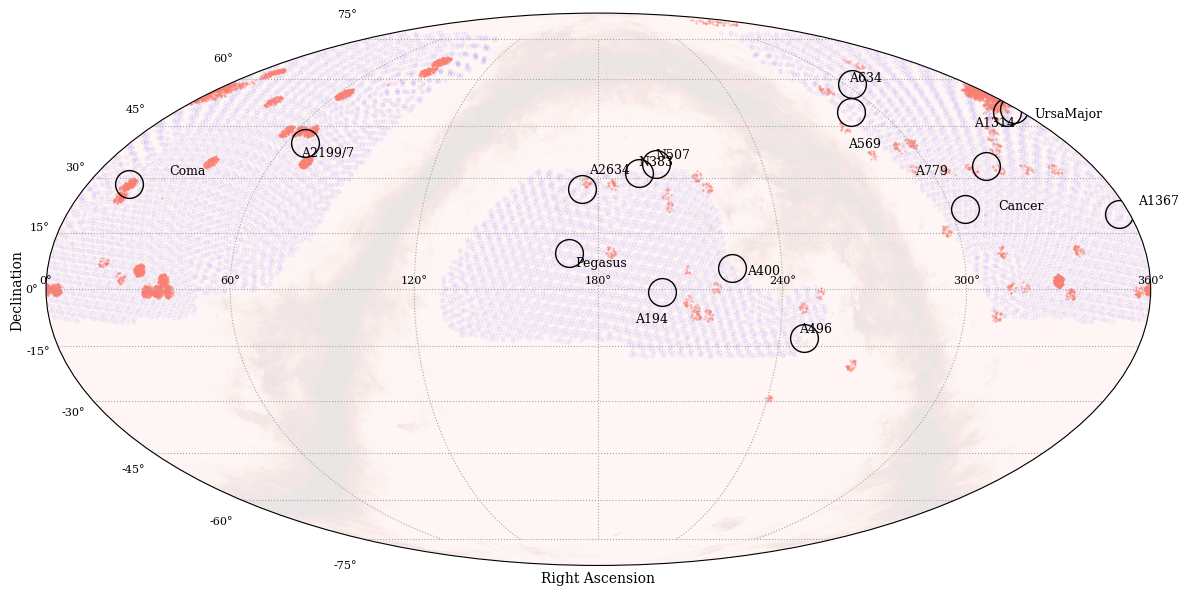

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.colors import Normalize

# Read the data
WISE_Data = pd.read_csv("WISE_Data_Mk2.txt", sep="\t", skiprows=[0], header=None)
WISE_Data.columns = ['2MAS_Name', 'NedName','Abell_ID', 'Morph_Type', 'Ra', 'Dec', 'Axis_Ratio', 'Luminosity_Distance',
                     'Redshift', 'Log_W', 'Log_W_err', 'flux_W1', 'flux_W1_err', 'flux_W2', 'flux_W2_err', 'mag_W1',
                     'mag_W2', 'mag_W1_err', 'mag_W2_err', 'Khaled Ids', 'Correct Cluster Names']

# Ensure RA is in 0-360 range
WISE_Data['Ra'] = WISE_Data['Ra'] % 360
groups = WISE_Data.groupby("Correct Cluster Names")

# Read fuji data and convert to RA and DEC
fuji = pd.read_csv("fuji_plot_n.csv", delimiter=' ')
c_gal = SkyCoord(l=np.array(fuji.l)*u.degree, b=np.array(fuji.b)*u.degree, frame='galactic')
c_icrs = c_gal.icrs
ra_fuji = c_icrs.ra.degree % 360  # Ensure RA is in 0-360 range
dec_fuji = c_icrs.dec.degree

print(f"RA range: {np.min(ra_fuji):.2f} to {np.max(ra_fuji):.2f} degrees")
print(f"DEC range: {np.min(dec_fuji):.2f} to {np.max(dec_fuji):.2f} degrees")

# Get an array of cluster ID's
Ids = list(groups.groups.keys())

# Set up the figure
plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection='mollweide')
plt.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05)

# position adjustments for the cluster names (so that they don't overlap with the points)
r_thing = [-0.38, 0.15, -0.15, 0.04, 0.04,
           -0.45, -0.02, 0.05, 0.09, -0.03,
           -0.22, 0.02, -0.48, -0.35, 0.2,
           -0.43,0.2, 0.1, -0.2, 0.09,
           -0.2, 0.1, -0.4, -0.0, 0.,
           -0.15, -0.41, 0.04, 0.06, -0.6, -1.45]
d_thing = [-0.07, 0.05, -0.14, -0.07, 0.08,
           0.06, 0.05, -0.04, -0.03, 0.025,
           -0.18, 0.02, -0.04, 0.05, -0.00,
           -0.05, 0.05, -0.03, -0.13, -0.03,
           -0.07, -0.03, 0.06, 0.04, 0.03,
           -0.18, 0.045, -0.06, -0.04, 0.06, 0.08]

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [-3.0, 0.0, 3.0]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=-1.0)

# Convert l_dust and b_dust to RA and DEC
c_dust = SkyCoord(l=np.array(l_dust)*u.degree, b=np.array(b_dust)*u.degree, frame='galactic')
c_dust_icrs = c_dust.icrs
ra_dust = c_dust_icrs.ra.degree % 360  # Ensure RA is in 0-360 range
dec_dust = c_dust_icrs.dec.degree

# Convert RA to range [-pi, pi] for plotting
ra_dust_rad = np.deg2rad(ra_dust)
ra_dust_rad = np.where(ra_dust_rad > np.pi, ra_dust_rad - 2*np.pi, ra_dust_rad)
dec_dust_rad = np.deg2rad(dec_dust)

ax.scatter(ra_dust_rad, dec_dust_rad, s=0.1, c=ebv_dust, edgecolors='none', cmap='Reds', norm=norm, alpha=0.1, rasterized=True)

for i, Id in enumerate(Ids):
    group = groups.get_group(Id)
    ra_group = np.average(group['Ra'])
    dec_group = np.average(group['Dec'])
    if dec_group > -18.0:
        ra_rad = np.deg2rad(ra_group)
        dec_rad = np.deg2rad(dec_group)
        
        # Convert RA to range [-pi, pi] for plotting
        if ra_rad > np.pi:
            ra_rad -= 2 * np.pi
        
        ax.text(ra_rad+r_thing[i], dec_rad+d_thing[i], r'{}'.format(Id), fontsize=9, color='black')
        ax.plot(ra_rad, dec_rad, 'o', markersize=20, color='black', markeredgecolor='black', mfc='none')

# Convert l_desi and b_desi to RA and DEC
c_desi = SkyCoord(l=np.array(l01_desi)*u.degree, b=np.array(x001_desi.b)*u.degree, frame='galactic')
c_desi_icrs = c_desi.icrs
ra_desi = c_desi_icrs.ra.degree % 360  # Ensure RA is in 0-360 range
dec_desi = c_desi_icrs.dec.degree

# Convert RA to range [-pi, pi] for plotting
ra_desi_rad = np.deg2rad(ra_desi)
ra_desi_rad = np.where(ra_desi_rad > np.pi, ra_desi_rad - 2*np.pi, ra_desi_rad)
dec_desi_rad = np.deg2rad(dec_desi)

ax.scatter(ra_desi_rad, dec_desi_rad, s=5., alpha=0.05, facecolors='none', edgecolors='b')

# Convert fuji data to radians and plot
ra_fuji_rad = np.deg2rad(ra_fuji)
ra_fuji_rad = np.where(ra_fuji_rad > np.pi, ra_fuji_rad - 2*np.pi, ra_fuji_rad)
dec_fuji_rad = np.deg2rad(dec_fuji)
ax.scatter(ra_fuji_rad, dec_fuji_rad, s=0.1, color='salmon')

ax.grid(visible=True, which='both', color='0.65', linestyle=':')
ax.set_ylabel('Declination', fontsize=10, labelpad=1)
ax.set_xlabel('Right Ascension', fontsize=10, labelpad=+4)

# Set custom x-axis ticks and labels
x_ticks = np.array([0, 60, 120, 180, 240, 300, 360])
x_tick_labels = ['0°', '60°', '120°', '180°', '240°', '300°', '360°']
ax.set_xticks(np.deg2rad(x_ticks) - np.pi)
ax.set_xticklabels(x_tick_labels)

plt.tight_layout()
plt.savefig('fuji_New_Mollweide_RADEC_0to360.pdf')
plt.show()

In [26]:
D_lim = 10.**(-0.2)
D_lim

0.6309573444801932